In [85]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
from scipy.special import kl_div
from scipy.stats import entropy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize

In [86]:
#data = pd.read_csv('/Users/haileysparks/Downloads/EEGdata_event.csv')
#data = pd.read_csv('EEGdata_event_R2D2_013.csv')
data = pd.read_csv('EEGdata_event_173012.csv')

# EDA

In [87]:
try:
    data = data.drop('Unnamed: 0',axis = 1)
except:
    print()

In [88]:
data.head()

,Delta,Theta,AlphaLow,AlphaHigh,BetaLow,BetaHigh,GammaLow,GammaMid,Event
0,0.459186,0.417279,0.259292,0.239891,0.242346,0.219752,0.155580,0.052329,Non-Trauma
1,0.459370,0.417724,0.259620,0.240387,0.242719,0.220084,0.156071,0.053022,Non-Trauma
2,0.459553,0.418166,0.259946,0.240881,0.243090,0.220413,0.156558,0.053712,Non-Trauma
3,0.459735,0.418605,0.260271,0.241371,0.243458,0.220740,0.157043,0.054398,Non-Trauma
4,0.459916,0.419043,0.260594,0.241858,0.243824,0.221064,0.157524,0.055080,Non-Trauma


In [89]:
data.tail()

,Delta,Theta,AlphaLow,AlphaHigh,BetaLow,BetaHigh,GammaLow,GammaMid,Event
10968,0.523322,0.446187,0.291152,0.311600,0.306367,0.262146,0.197159,0.166094,Trauma
10969,0.523822,0.445963,0.290797,0.312177,0.306940,0.262629,0.197649,0.166968,Trauma
10970,0.524323,0.445738,0.290441,0.312755,0.307516,0.263113,0.198141,0.167845,Trauma
10971,0.524826,0.445511,0.290082,0.313336,0.308094,0.263599,0.198635,0.168726,Trauma
10972,0.525330,0.445282,0.289722,0.313918,0.308674,0.264087,0.199131,0.169610,Non-Trauma


In [90]:
data.describe()

,Delta,Theta,AlphaLow,AlphaHigh,BetaLow,BetaHigh,GammaLow,GammaMid
count,10973.000000,10973.000000,10973.000000,10973.000000,10973.000000,10973.000000,10973.000000,10973.000000
mean,0.452745,0.410834,0.260605,0.224393,0.208448,0.188557,0.141806,0.077580
std,0.036863,0.042841,0.035640,0.034392,0.034153,0.040379,0.039759,0.023099
min,0.341616,0.297218,0.160925,0.148045,0.131276,0.108894,0.061206,0.034321
25%,0.430602,0.380950,0.237447,0.195829,0.183634,0.157025,0.109298,0.059621
50%,0.458966,0.414377,0.264638,0.222647,0.207296,0.184302,0.140489,0.075155
75%,0.478376,0.444444,0.286383,0.250306,0.235682,0.219779,0.169110,0.091904
max,0.535789,0.497070,0.329911,0.313918,0.308674,0.301101,0.256246,0.169610


/var/folders/zp/r9b8tlx538z0pv81glcn3t740000gn/T/ipykernel_10409/2217796319.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.cov())


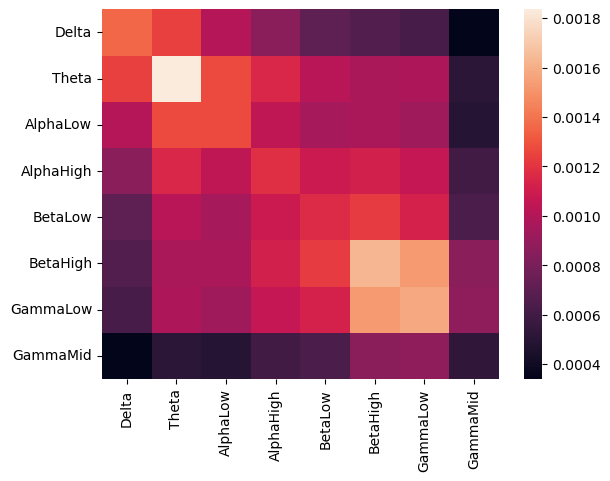

In [91]:
sns.heatmap(data.cov())
plt.show()

# Classification

In [92]:
from statistics import mean
from random import shuffle
from nltk import NaiveBayesClassifier as nbc
from itertools import chain
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [93]:
y = data.iloc[:,8]
X = data.iloc[:,:8]

# Split training and testing 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=115
)

In [94]:
training_results = {"Log Regr.": 0, "SVM": 0, "Random Forest":0, "Neural Net": 0,"Naive Bayes": 0}

In [95]:
def get_results(X_train, X_test, y_train, y_test,training_results):
    # Log Regr
    LR = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
    LR.predict(X_test)
    training_results["Log Regr."] = round(LR.score(X_test,y_test), 4)
    
    # SVM 
    
    SVM = svm.LinearSVC()
    SVM.fit(X_train, y_train)
    SVM.predict(X_test)
    training_results["SVM"] = round(SVM.score(X_test,y_test), 4)
    
    # Random Forest
    RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    RF.fit(X_train, y_train)
    RF.predict(X_test)
    training_results["Random Forest"] = round(RF.score(X_test,y_test), 4)
    
    # Neural Net
    
    NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=0)
    NN.fit(X_train, y_train)
    predict_train = NN.predict(X_train)
    predict_test = NN.predict(X_test)
    training_results["Neural Net"] = round(NN.score(X_test,y_test), 4)
    
    # Naive Bayes 
    NB = GaussianNB()
    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test)
    accuray = accuracy_score(y_pred, y_test)
    training_results["Naive Bayes"] = round(NB.score(X_test,y_test), 4)
    
    return training_results



In [96]:
print(get_results(X_train, X_test, y_train, y_test,training_results))

{'Log Regr.': 0.9904, 'SVM': 0.9904, 'Random Forest': 0.9968, 'Neural Net': 0.9991, 'Naive Bayes': 0.9608}


/Users/haileysparks/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Dimensionality reduction 

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
data_numeric = data.drop("Event",axis =1)
df_pca = pca.fit(data_numeric)

In [98]:
pca.get_feature_names_out(input_features=None)

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7'],
      dtype=object)

In [99]:
def principal_components(dfx_pca):
    plt.figure(figsize=(10,6))
    plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
    plt.grid(True)
    plt.title("Explained variance ratio of the fitted principal component vector\n")
    plt.xlabel("Principal components",fontsize=15)
    plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))])
    plt.yticks(fontsize=15)
    plt.ylabel("Explained variance ratio",fontsize=15)
    plt.show()

def transform(dfx):
    dfx_trans = pca.transform(dfx)
    dfx_trans = pd.DataFrame(data=dfx_trans)
    return dfx_trans

def plot_components(data, trans,comp_1,comp_2,feature):
    colors = []
    for i in range(0,len(data.loc[:,feature])):
        colors.append(i)

    plt.figure(figsize=(10,6))
    plt.scatter(dfx_trans[comp_1],dfx_trans[comp_2],c = colors,edgecolors='k',alpha=0.75,s=150)
    plt.grid(True)
    plt.title("using first two principal components\n")
    plt.xlabel("Principal component-1",fontsize=15)
    plt.ylabel("Principal component-2",fontsize=15)
    plt.show()

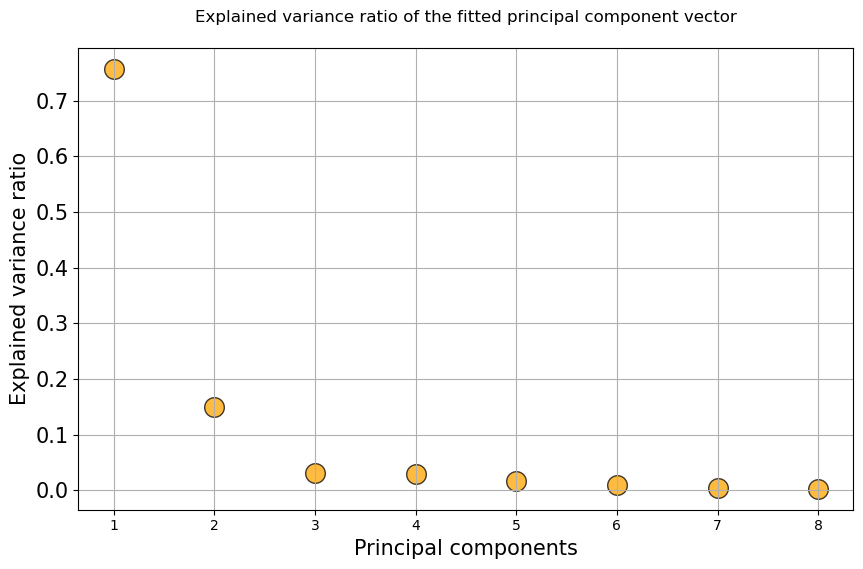

In [100]:
principal_components(df_pca)

In [101]:
df_trans = transform(data_numeric)

# dfx_trans = pca.transform(dfx)
# dfx_trans = pd.DataFrame(data=dfx_trans)
df_trans.tail(10)

,0,1,2,3,4,5,6,7
10963,-0.178720,0.025493,0.023474,-0.032554,0.044213,-0.015867,0.022491,0.034833
10964,-0.179627,0.026115,0.024029,-0.032746,0.044860,-0.016204,0.022710,0.035143
10965,-0.180537,0.026740,0.024586,-0.032939,0.045510,-0.016542,0.022930,0.035454
10966,-0.181450,0.027369,0.025145,-0.033133,0.046163,-0.016881,0.023152,0.035767
10967,-0.182366,0.028001,0.025708,-0.033328,0.046818,-0.017222,0.023373,0.036081
10968,-0.183285,0.028637,0.026273,-0.033523,0.047476,-0.017565,0.023596,0.036396
10969,-0.184207,0.029276,0.026840,-0.033720,0.048136,-0.017908,0.023820,0.036713
10970,-0.185131,0.029918,0.027410,-0.033918,0.048799,-0.018253,0.024044,0.037030
10971,-0.186059,0.030564,0.027983,-0.034116,0.049465,-0.018600,0.024269,0.037349
10972,-0.186989,0.031213,0.028558,-0.034316,0.050133,-0.018947,0.024495,0.037669
